# K means clustering

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
ohe = OneHotEncoder(sparse=False)

In [4]:
country_encoded = ohe.fit_transform(df[['country']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
country_df = pd.DataFrame(country_encoded,columns=ohe.get_feature_names_out(['country']))

In [6]:
print(country_df.head())

   country_Afghanistan  country_Albania  country_Algeria  country_Angola  \
0                  1.0              0.0              0.0             0.0   
1                  0.0              1.0              0.0             0.0   
2                  0.0              0.0              1.0             0.0   
3                  0.0              0.0              0.0             1.0   
4                  0.0              0.0              0.0             0.0   

   country_Antigua and Barbuda  country_Argentina  country_Armenia  \
0                          0.0                0.0              0.0   
1                          0.0                0.0              0.0   
2                          0.0                0.0              0.0   
3                          0.0                0.0              0.0   
4                          1.0                0.0              0.0   

   country_Australia  country_Austria  country_Azerbaijan  ...  \
0                0.0              0.0                 0.

In [7]:
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 167 entries, country_Afghanistan to country_Zambia
dtypes: float64(167)
memory usage: 218.0 KB
None


In [8]:
df = pd.concat([df.drop('country',axis=1),country_df],axis=1)

In [9]:
print(df.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country_Afghanistan  ...  country_United Arab Emirates  \
0       5.82    553                  1.0  ...                           0.0   
1       1.65   4090                  0.0  ...                           0.0   
2       2.89   4460                  0.0  ...                           0.0   
3       6.16   3530                  0.0  ...                           0.0   
4       2.13  12200                  0.0  ...                           0.0   

   country_United Kingdom  country_United States  country_Uruguay  \
0          

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 176 entries, child_mort to country_Zambia
dtypes: float64(174), int64(2)
memory usage: 229.8 KB
None


In [11]:
print(df.shape)

(167, 176)


In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [14]:
print(wcss)

[117459687635.07814, 36528388099.3221, 21710210203.75414, 14610713609.535135, 10655378245.862547, 7655725250.094503, 5353767617.73232, 4258897352.751582, 3228565423.6980796, 2669181829.033748]


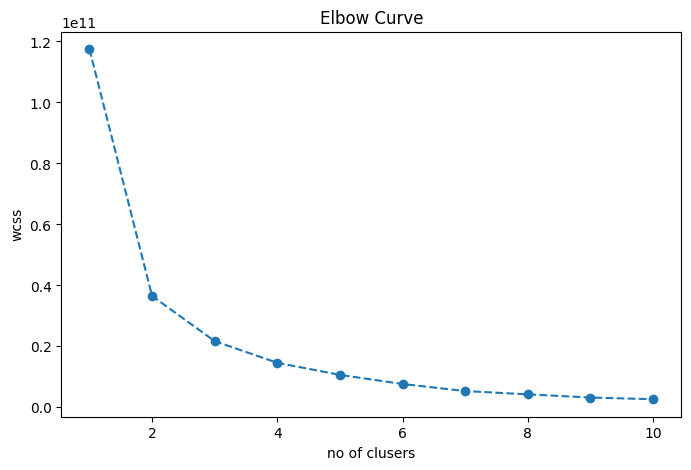

In [15]:
#plot elbow curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title("Elbow Curve")
plt.xlabel("no of clusers")
plt.ylabel('wcss')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4,random_state=42)
y_kmeans = kmeans.fit_predict(df)
df['cluster']=y_kmeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
print(df.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country_Afghanistan  ...  country_United Kingdom  \
0       5.82    553                  1.0  ...                     0.0   
1       1.65   4090                  0.0  ...                     0.0   
2       2.89   4460                  0.0  ...                     0.0   
3       6.16   3530                  0.0  ...                     0.0   
4       2.13  12200                  0.0  ...                     0.0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                    0.0              0.0          

In [18]:
labels = kmeans.labels_

In [19]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6109297327684861


# Agglomerative Clustering

In [20]:
print(df.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  country_Afghanistan  ...  country_United Kingdom  \
0       5.82    553                  1.0  ...                     0.0   
1       1.65   4090                  0.0  ...                     0.0   
2       2.89   4460                  0.0  ...                     0.0   
3       6.16   3530                  0.0  ...                     0.0   
4       2.13  12200                  0.0  ...                     0.0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                    0.0              0.0          

In [21]:
print(df.shape)

(167, 177)


In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [24]:
labels = ac.fit_predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
print(labels)

[2 2 2 2 1 1 2 0 0 2 1 1 2 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 2 0 2 2 2 1 2 2 2
 2 2 2 2 1 1 1 0 2 2 2 2 1 2 1 2 0 0 2 2 2 0 2 1 2 2 2 2 2 2 1 0 2 2 2 2 0
 1 0 2 0 2 1 2 2 0 2 2 1 2 2 2 1 1 0 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 1 2 2 0 1 2 2 2 2 2 1 1 0 2 1 2 2 1 2 2 1 2 0 1 1 2 2 1 1 2 2 2 2 0 0 2 2
 2 2 2 2 2 1 2 2 2 0 0 0 1 2 2 1 2 2 2]


In [26]:
from sklearn.metrics import silhouette_score

In [27]:
print(f"silhouette_score: {silhouette_score(df,labels)}")

silhouette_score: 0.5963166843614005
